## GPT Training Evaluation

In [303]:
import os
import matplotlib.pyplot as plt

In [304]:
# GPT-2 (124M) Loss after 100B tokens
gpt2_loss = 3.2924

# GPT-2 (124M) and GPT-3 (125M) HellaSwag acc after 100B and 300B tokens respectively
gpt2_hs = 0.294
gpt3_hs = 0.337

log_dir = 'cache/logs'
log_file = '124M_14B.txt'

# Read the log file, group by stream name ('train', 'val', 'hellaswag')
streams = {}
with open(os.path.join(log_dir, log_file), 'r') as f:
    for line in f:
        step, n_tokens, stream, val = line.strip().split()
        if stream not in streams:
            streams[stream] = ([], [])
        streams[stream][0].append(int(n_tokens[1:-1]))
        streams[stream][1].append(float(val))

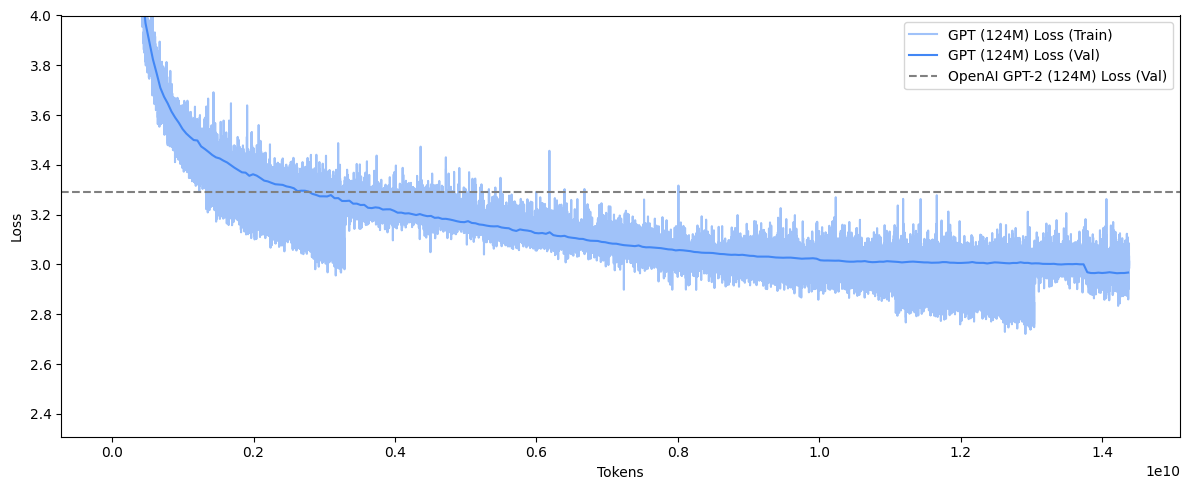

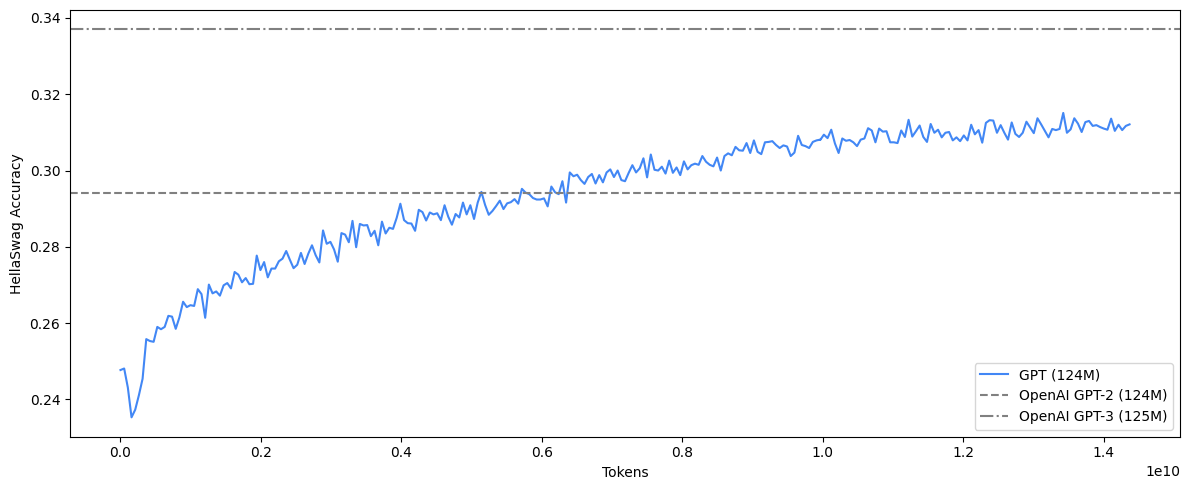

In [308]:
# Train and Validation Loss
plt.figure(figsize=(12, 5))
plt.plot(*streams['train'], color='#4287f5', alpha=0.5, label='GPT (124M) Loss (Train)')
plt.plot(*streams['val'], color='#4287f5', label='GPT (124M) Loss (Val)')
# Plot the GPT-2 loss baseline
plt.axhline(y=gpt2_loss, color='grey', linestyle='--', label='OpenAI GPT-2 (124M) Loss (Val)')
plt.xlabel('Tokens')
plt.ylabel('Loss')
plt.ylim(top=4.0)
plt.legend()
plt.tight_layout()
plt.savefig(f'{log_dir}/{log_file[:-4]}_loss.png')
plt.show()

# HellaSwag Evaluation
plt.figure(figsize=(12, 5))
plt.plot(*streams['hellaswag'], color='#4287f5', label='GPT (124M)')
# Plot the GPT-2 and GPT-3 HellaSwag checkpoints
plt.axhline(y=gpt2_hs, color='grey', linestyle='--', label='OpenAI GPT-2 (124M)')
plt.axhline(y=gpt3_hs, color='grey', linestyle='-.', label='OpenAI GPT-3 (125M)')
plt.xlabel('Tokens')
plt.ylabel('HellaSwag Accuracy')
plt.legend()
plt.tight_layout()
plt.savefig(f'{log_dir}/{log_file[:-4]}_hs.png')
plt.show()